# PCA

## PCA Implementation
Select a set of grayscale images (e.g., faces, landscapes, or any other category).
Normalize the images by scaling pixel values to a range [0, 1].

1. Convert the image into a 2D matrix where each row represents an image and each column
represents a pixel value.
2. Compute the covariance matrix of the image data.
3. Calculate the eigenvalues and eigenvectors of the covariance matrix.
4. Sort the eigenvectors based on the eigenvalues in descending order.
5. Select the top k eigenvectors to form the principal components.
6. Project the original images onto the lower-dimensional subspace defined by the selected
principal components.

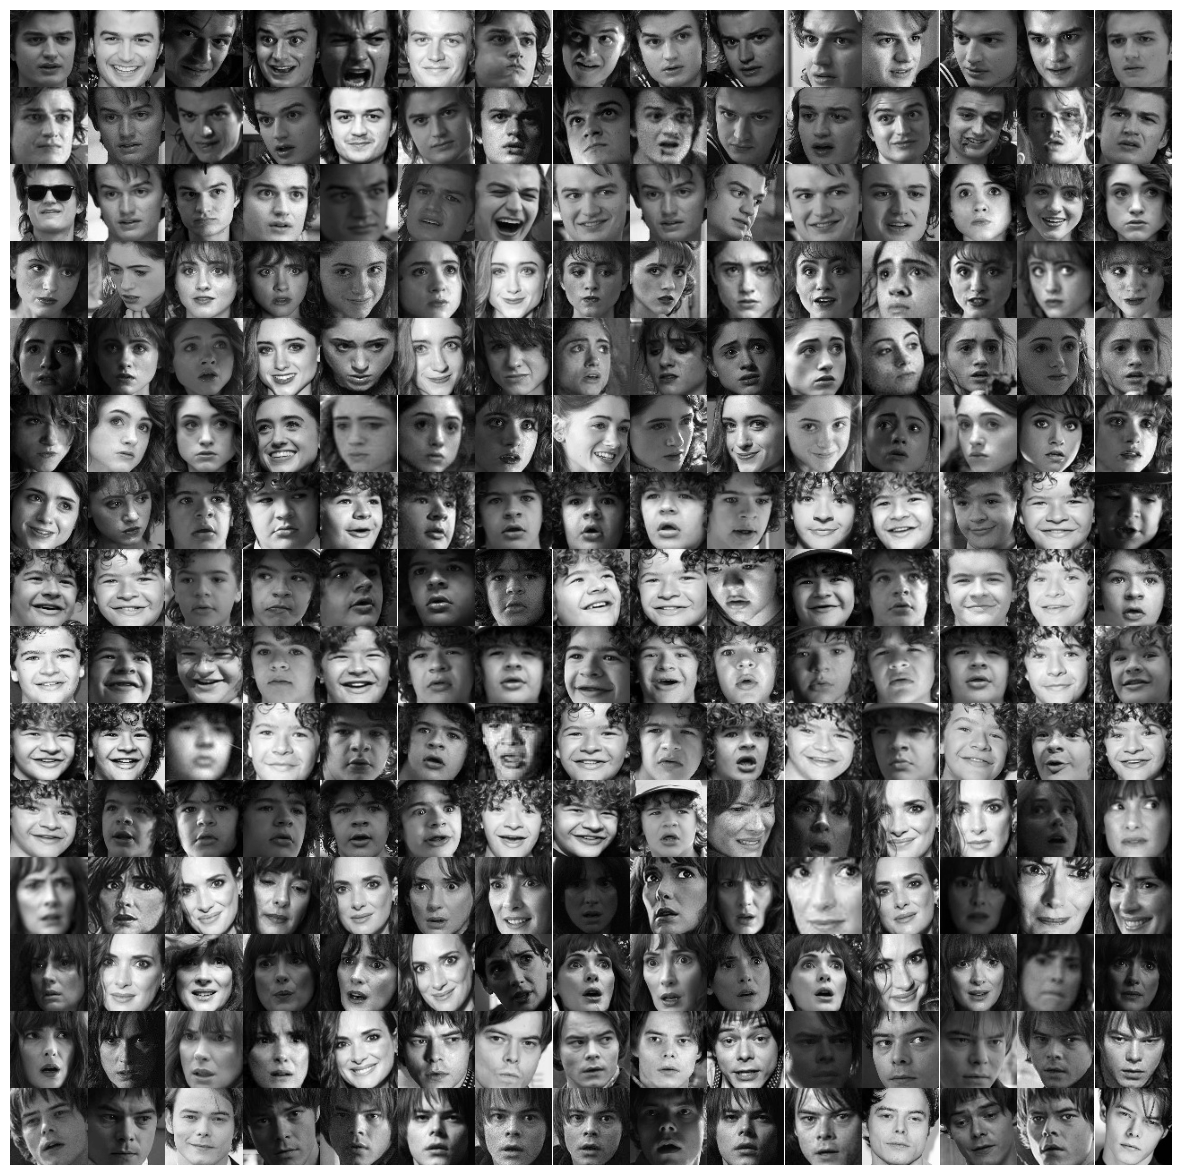

In [172]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to collect all images from a folder (including subfolders)
def collect_images_from_folder(folder_path):
    image_paths = []
    # Walk through all subfolders and gather image file paths
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Add conditions for image file types if necessary
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Function to display images in a grid
def display_images_in_grid(image_paths, rows=15, cols=15):
    # Calculate how many images we need to display
    total_images = rows * cols
    # Limit the number of images to display
    images_to_display = image_paths[:total_images]

    # Load, convert to grayscale, and resize images
    images = [Image.open(img_path).convert('L').resize((86, 86)) for img_path in images_to_display]  # resize to 86x86 for example
    fig, axs = plt.subplots(rows, cols, figsize=(cols, rows), gridspec_kw={'wspace': 0, 'hspace': 0})
    
    # Remove padding between images
    plt.subplots_adjust(wspace=0, hspace=0)
    
    for i, ax in enumerate(axs.ravel()):
        if i < len(images):
            # Convert the image to a numpy array for displaying
            ax.imshow(np.asarray(images[i]), cmap='gray')
            ax.axis('off')  # No axis, just the image
        else:
            ax.axis('off')  # In case there are fewer images than grid spots

    plt.show()

# Folder containing the images
folder_path = 'Stranger things grayscale'  # Update with your folder path

# Collect all image paths
image_paths = collect_images_from_folder(folder_path)

# Display images in a 15x15 grid
display_images_in_grid(image_paths, rows=15, cols=15)

## Convert images to grayscale, normalize and perform PCA

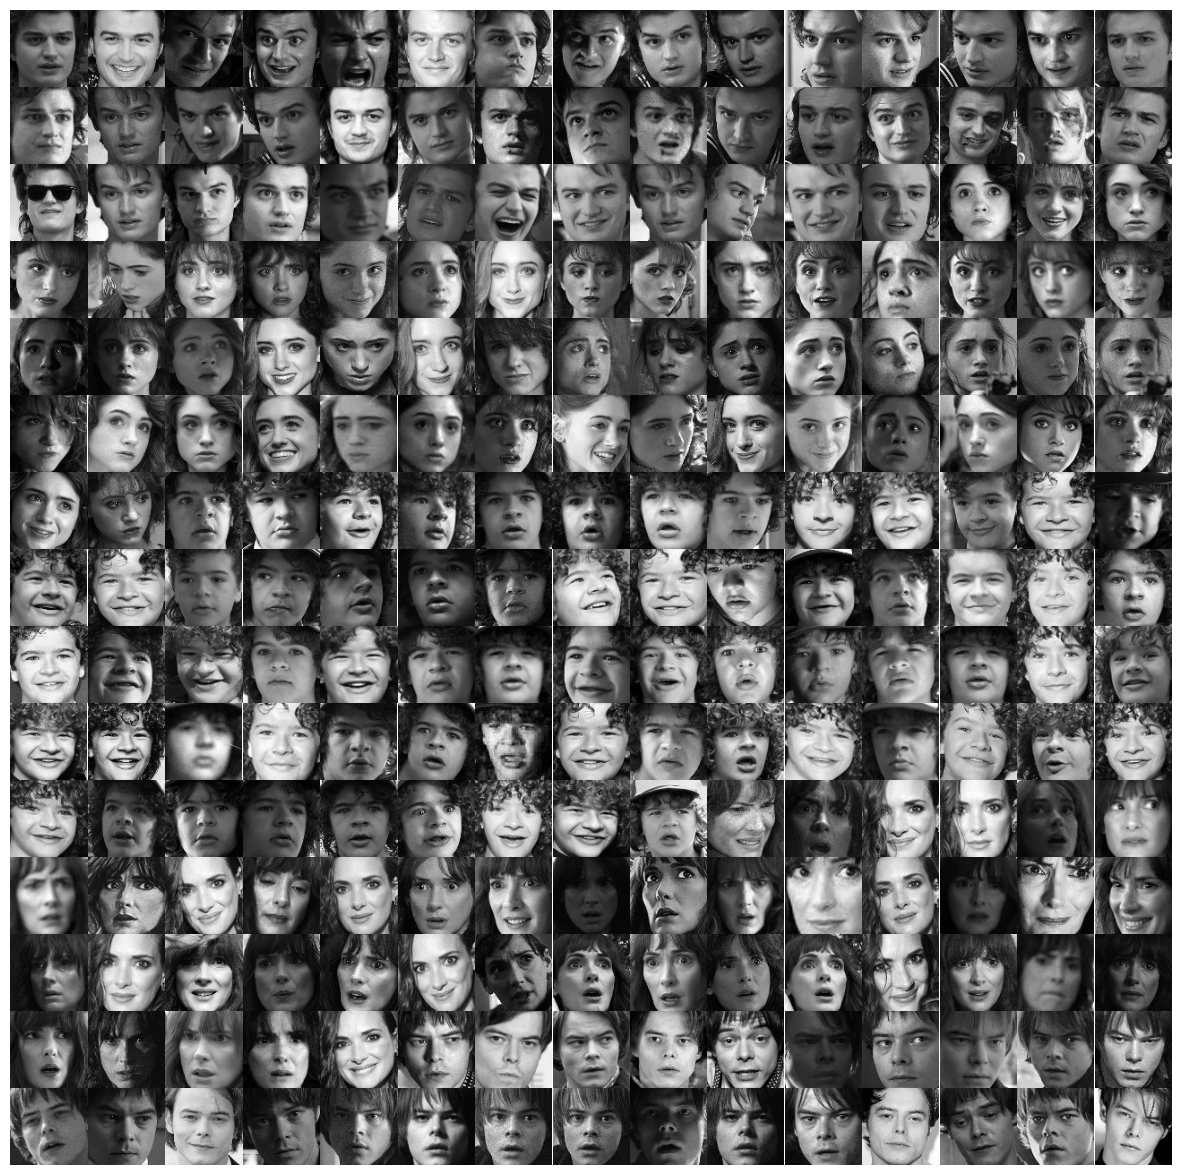

In [148]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to collect all images from a folder (including subfolders)
def collect_images_from_folder(folder_path):
    image_paths = []
    # Walk through all subfolders and gather image file paths
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Add conditions for image file types if necessary
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Function to display images in a grid
def display_images_in_grid(images, rows=15, cols=15):
    # Limit the number of images to display
    total_images = rows * cols
    images_to_display = images[:total_images]

    fig, axs = plt.subplots(rows, cols, figsize=(cols, rows), gridspec_kw={'wspace': 0, 'hspace': 0})
    
    # Remove padding between images
    plt.subplots_adjust(wspace=0, hspace=0)
    
    for i, ax in enumerate(axs.ravel()):
        if i < len(images_to_display):
            ax.imshow(images_to_display[i], cmap='gray')  # Display the grayscale normalized image
            ax.axis('off')  # No axis, just the image
        else:
            ax.axis('off')  # In case there are fewer images than grid spots

    plt.show()

# Function to preprocess the images (resize, grayscale, and normalize)
def preprocess_images(image_paths, image_size=(86, 86)):
    processed_images = []
    for img_path in image_paths:
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img_resized = img.resize(image_size)  # Resize
        img_array = np.array(img_resized) / 255.0  # Normalize to [0, 1]
        processed_images.append(img_array)
    return np.array(processed_images)

# Function to flatten images for PCA
def flatten_images(images):
    return np.array([img.flatten() for img in images])

# Function to perform PCA on flattened images
def perform_pca(flattened_images, n_components=50):
    pca = PCA(n_components=n_components)
    # Fit PCA and transform the images
    transformed = pca.fit_transform(flattened_images)
    return transformed, pca

# Folder containing the images
folder_path = 'Stranger things grayscale'  # Update with your folder path

# Collect all image paths
image_paths = collect_images_from_folder(folder_path)

# Preprocess the images (grayscale, resize, normalize)
image_size = (86, 86)  # Ensure consistent resizing across functions
processed_images = preprocess_images(image_paths, image_size=image_size)

# Flatten the preprocessed images for PCA
flattened_images = flatten_images(processed_images)

# Perform PCA (without reconstruction)
transformed_images, pca_model = perform_pca(flattened_images, n_components=50)

# Optionally, display the original images in a grid
display_images_in_grid(processed_images, rows=15, cols=15)

# Now, `transformed_images` contains the reduced representation of the images.
# You can inspect the transformed PCA data if needed.


## Converted images to 2D matrix where each row represents an image and each column represents a pixel value between 0,1

0 = black
1 = white

In [155]:
import os
from PIL import Image
import numpy as np

# Function to collect all images from a folder (including subfolders)
def collect_images_from_folder(folder_path):
    image_paths = []
    # Walk through all subfolders and gather image file paths
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Add conditions for image file types if necessary
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Function to load and flatten images into a 2D matrix
def images_to_matrix(image_paths, image_size=(64, 64)):
    # Initialize a list to store flattened image arrays
    image_matrix = []
    
    for img_path in image_paths:
        # Open the image, convert to grayscale, and resize
        img = Image.open(img_path).convert('L')  # Convert to grayscale ('L' mode)
        img_resized = img.resize(image_size)  # Resize to fixed dimensions (64x64)
        
        # Flatten the image into a 1D array and normalize the pixel values
        img_flattened = np.array(img_resized).flatten() / 255.0  # Normalize to [0, 1]
        
        # Append the flattened image to the matrix
        image_matrix.append(img_flattened)
    
    # Convert the list of flattened images into a 2D numpy array
    return np.array(image_matrix)

# Folder containing the images
folder_path = 'Stranger things grayscale'  # Update with your folder path

# Collect all image paths
image_paths = collect_images_from_folder(folder_path)

# Convert images to a 2D matrix (each row is an image, each column is a pixel)
image_size = (86, 86)  # Resize images to 64x64 pixels
image_matrix = images_to_matrix(image_paths, image_size)

# Now `image_matrix` is a 2D numpy array where each row is a flattened image
print("Shape of the image matrix:", image_matrix.shape)
print(image_matrix[:5])


Shape of the image matrix: (620, 7396)
[[0.06666667 0.09411765 0.10196078 ... 0.89803922 0.95294118 0.28235294]
 [0.01960784 0.03921569 0.08235294 ... 0.6        0.60392157 0.60392157]
 [0.00784314 0.01960784 0.00784314 ... 0.01176471 0.02352941 0.03921569]
 [0.03137255 0.05098039 0.01960784 ... 0.01176471 0.01960784 0.02352941]
 [0.01568627 0.02745098 0.04705882 ... 0.02745098 0.02745098 0.02745098]]


## Covariance matrix

In [156]:
# Compute the covariance matrix of the image data
cov_matrix = np.cov(image_matrix, rowvar=False)

# Display the shape of the covariance matrix
print("Shape of the covariance matrix:", cov_matrix.shape)

# Optionally, display a part of the covariance matrix to inspect
print("Covariance matrix (first 5x5 block):")
print(cov_matrix[:5, :5])

Shape of the covariance matrix: (7396, 7396)
Covariance matrix (first 5x5 block):
[[0.03713031 0.03352433 0.02939153 0.02700457 0.02523389]
 [0.03352433 0.03505    0.03093369 0.02809856 0.02637152]
 [0.02939153 0.03093369 0.0319162  0.02931567 0.02663258]
 [0.02700457 0.02809856 0.02931567 0.03078992 0.02810011]
 [0.02523389 0.02637152 0.02663258 0.02810011 0.02977287]]


## Eigenvalues and Eigenvectors of covariance matrix

In [157]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Display the eigenvalues and eigenvectors
print("Eigenvalues:", eigenvalues)
print("Eigenvectors (first 5):", eigenvectors[:, :5])

Eigenvalues: [-4.93126764e-14 -1.28466017e-14 -1.25449324e-14 ...  1.87967568e+01
  2.77972566e+01  1.36488618e+02]
Eigenvectors (first 5): [[ 1.06863846e-10 -1.05229366e-10  0.00000000e+00 -2.22788033e-10
   0.00000000e+00]
 [-2.74969674e-01  2.66776484e-01 -9.48197318e-02  6.64406815e-01
   1.03424066e-02]
 [-5.05661020e-01  3.68444508e-01 -1.26720686e-02 -6.05432508e-01
  -2.21513823e-03]
 ...
 [ 5.33421257e-03  1.09389611e-02 -1.31025362e-02 -3.51442642e-04
   2.46853441e-02]
 [-1.73283996e-02 -1.69967544e-02  1.69912931e-02  1.52095039e-03
  -2.43113437e-03]
 [-9.77770097e-03 -5.45320268e-03 -7.31629883e-03  3.26345005e-04
  -1.77292653e-04]]


In [158]:
# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display the sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:", sorted_eigenvalues)
print("Sorted Eigenvectors (first 5):", sorted_eigenvectors[:, :5])

Sorted Eigenvalues: [ 1.36488618e+02  2.77972566e+01  1.87967568e+01 ... -1.25449324e-14
 -1.28466017e-14 -4.93126764e-14]
Sorted Eigenvectors (first 5): [[-0.00209999 -0.00094968  0.00402232 -0.0079447   0.01570528]
 [-0.00234478 -0.00066689  0.0039361  -0.0091602   0.01648198]
 [-0.00221968 -0.00027955  0.00294478 -0.01031866  0.01642307]
 ...
 [-0.00582798 -0.01126352  0.01750134 -0.01626134 -0.00173928]
 [-0.00587477 -0.01000254  0.01711382 -0.0161234  -0.00235978]
 [-0.00572813 -0.00919315  0.01695402 -0.01643253 -0.00402096]]


In [175]:
# Number of principal components to select
k = 1000  # You can adjust this value as needed

# Select the top k eigenvectors
principal_components = sorted_eigenvectors[:, :k]

# Display the shape of the principal components matrix
print("Size of the principal components matrix:", principal_components.shape)

Size of the principal components matrix: (7396, 1000)


Shape of the projected images matrix: (620, 1000)


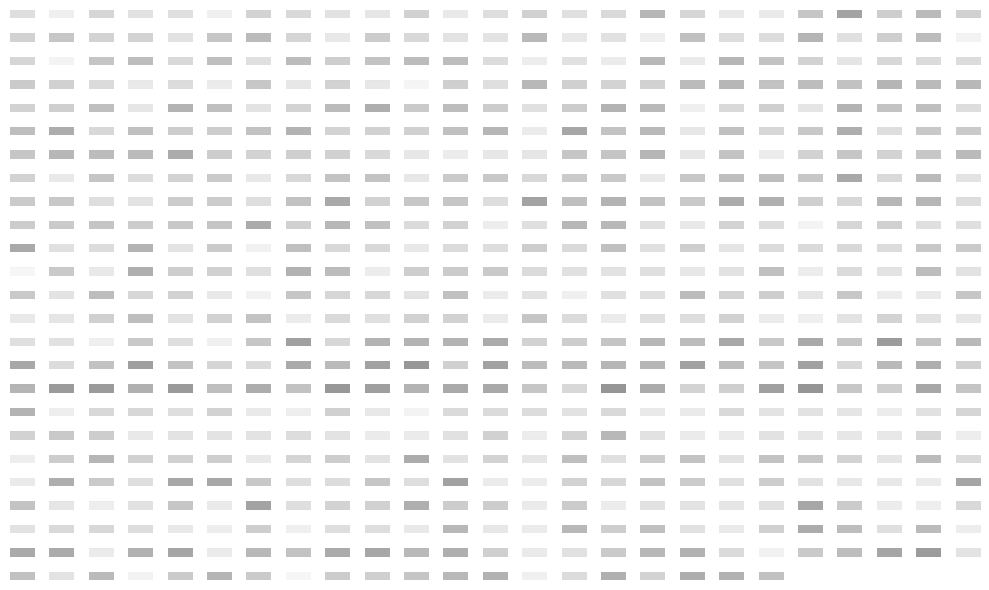

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `projected_images` and `principal_components` are already defined and computed

# Project the original images onto the lower-dimensional subspace
projected_images = np.dot(image_matrix, principal_components)

# Display the shape of the projected images matrix
print("Shape of the projected images matrix:", projected_images.shape)

# Define number of images to display
num_images = len(projected_images)

# Automatically calculate grid size based on the number of images
n_rows = int(np.ceil(np.sqrt(num_images)))  # Round up to ensure enough rows
n_cols = int(np.ceil(num_images / n_rows))  # Ensure enough columns

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.ravel()

# Try to reshape based on the number of principal components (k)
k = projected_images.shape[1]  # Number of principal components
if int(np.sqrt(k)) ** 2 == k:  # Check if k is a perfect square
    reshaped_size = (int(np.sqrt(k)), int(np.sqrt(k)))
else:
    reshaped_size = (k,)  # 1D array for heatmap

# Loop through and display the projected images
for i in range(num_images):
    # Ensure the current axis exists
    if i >= len(axes):
        break  # Stop if we run out of axes

    # If reshaped_size is 1D (not a perfect square), visualize the 1D array as a heatmap
    if len(reshaped_size) == 1:
        axes[i].imshow(projected_images[i].reshape(-1, 1), cmap='gray', aspect='auto')  # Display 1D heatmap
    else:
        axes[i].imshow(projected_images[i].reshape(reshaped_size), cmap='gray')  # Reshape to a square if possible
    axes[i].axis('off')

# Remove unused subplots if there are fewer images than subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Shape of the reconstructed images matrix: (620, 7396)


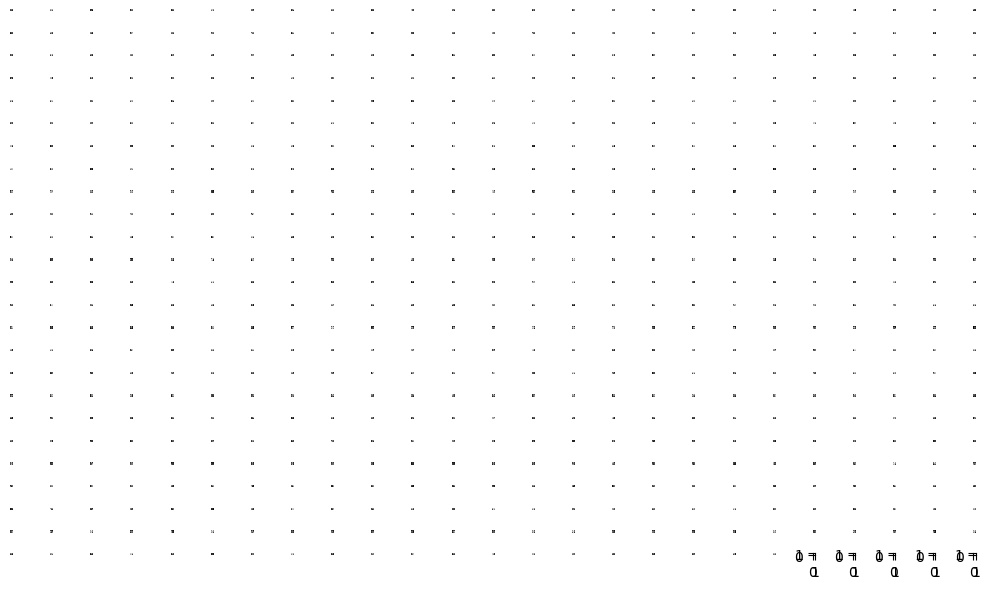

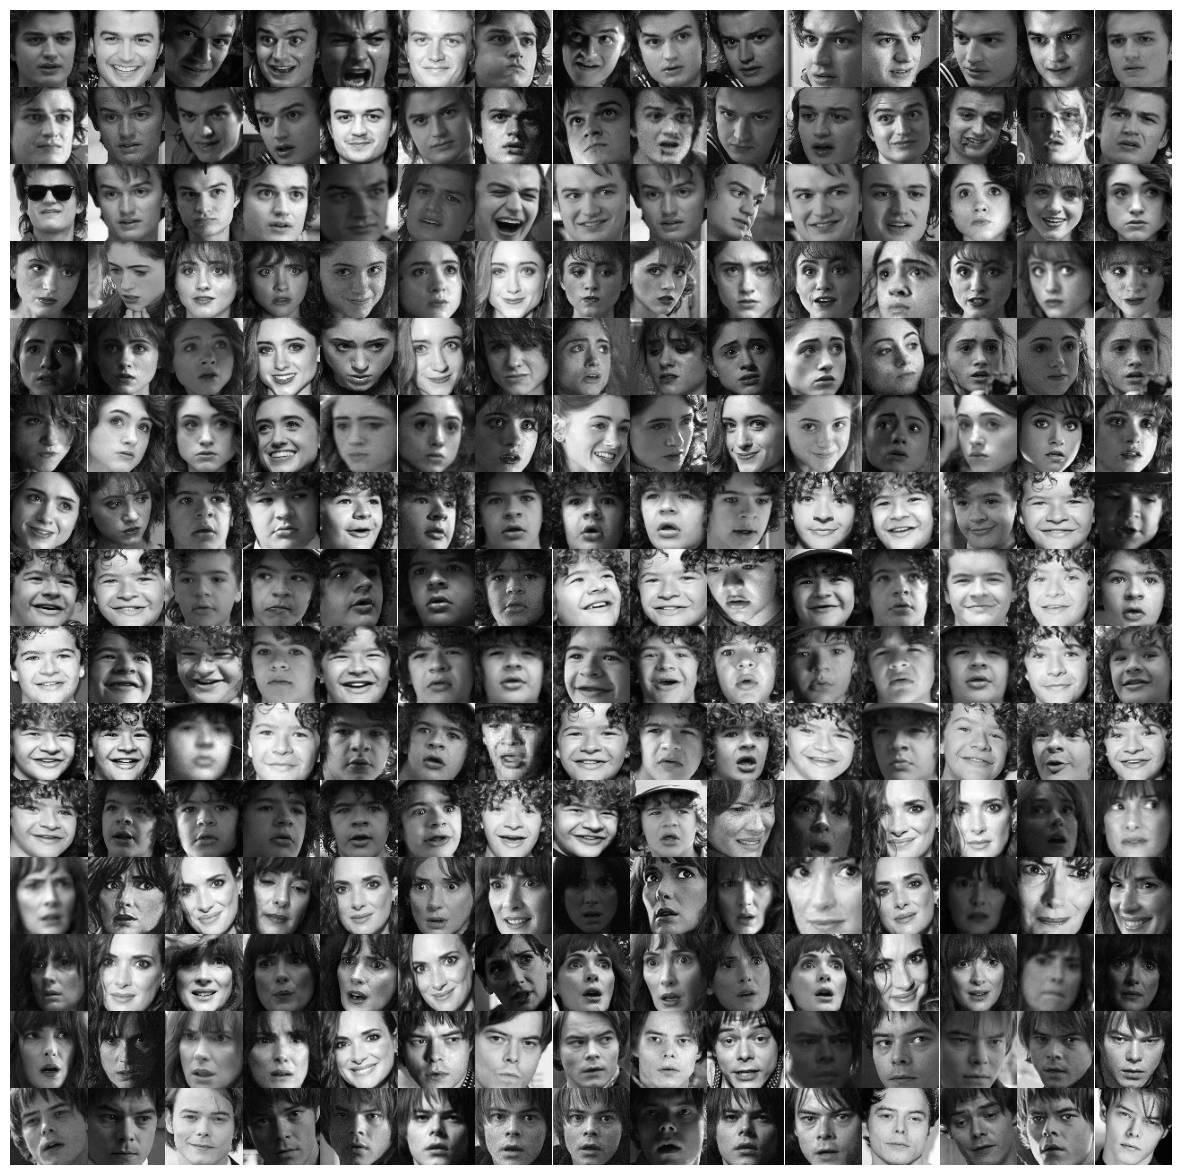

In [177]:
# Reconstruct the images from the lower-dimensional subspace
reconstructed_images = np.dot(projected_images, principal_components.T)

# Display the shape of the reconstructed images matrix
print("Shape of the reconstructed images matrix:", reconstructed_images.shape)

# Optionally, display the reconstructed images
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.ravel()

for i in range(len(reconstructed_images)):
    axes[i].imshow(reconstructed_images[i].reshape(image_size), cmap='gray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

def display_images_in_grid(images, rows=15, cols=15, image_size=(86, 86)):
    # Limit the number of images to display
    total_images = rows * cols
    images_to_display = images[:total_images]

    fig, axs = plt.subplots(rows, cols, figsize=(cols, rows), gridspec_kw={'wspace': 0, 'hspace': 0})
    
    # Remove padding between images
    plt.subplots_adjust(wspace=0, hspace=0)
    
    for i, ax in enumerate(axs.ravel()):
        if i < len(images_to_display):
            ax.imshow(images_to_display[i].reshape(image_size), cmap='gray')  # Reshape and display the grayscale normalized image
            ax.axis('off')  # No axis, just the image
        else:
            ax.axis('off')  # In case there are fewer images than grid spots

    plt.show()

display_images_in_grid(reconstructed_images, rows=15, cols=15, image_size=image_size)


In [178]:
mse = np.mean((image_matrix - reconstructed_images) ** 2)

# Display the MSE
print("Mean Squared Error (MSE) between the original and reconstructed images:", mse)

Mean Squared Error (MSE) between the original and reconstructed images: 1.6405461953142463e-05
